#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# check version number
import imblearn
print(imblearn.__version__)

0.4.3


#Importing Data

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Loan_Eligibility_Predictor.csv to Loan_Eligibility_Predictor.csv


In [ ]:
df=pd.read_csv("Loan_Eligibility_Predictor.csv")

In [ ]:
Loan_df=df

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.shape

(100514, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

# Data cleaning


In [ ]:
# Dropping the unnecessary columns 
# As Loan ID and Customer ID are used for identification purpose and won't of much use in prediction , so dropping the columns 
Loan_df.drop(labels =['Loan ID','Customer ID'],axis=1,inplace=True)

In [ ]:
# Identify the percentage of values missing

def missing_val_colums(data):
  # Total missing values
  missing_val=data.isnull().sum()

  # Percentage of missing values
  missing_percentage=(data.isnull().sum() *100 / len(data)).round(2)

  #combining both the values
  missing_table=pd.concat([missing_val, missing_percentage], axis=1)

  #rename the columns
  missing_data=missing_table.rename(columns={0 : 'Number of missing values',1:'Percentage of missing values'})

  #sorting the colums based on percentage
  missing_data=missing_data[missing_data.iloc[:,0]>0].sort_values('Percentage of missing values', ascending=False)

  return missing_data

In [ ]:
missing_val_colums(Loan_df)

,Number of missing values,Percentage of missing values
Months since last delinquent,53655,53.38
Credit Score,19668,19.57
Annual Income,19668,19.57
Years in current job,4736,4.71
Bankruptcies,718,0.71
Tax Liens,524,0.52
Maximum Open Credit,516,0.51
Current Credit Balance,514,0.51
Number of Credit Problems,514,0.51
Number of Open Accounts,514,0.51


In [ ]:
# As column "Months since last delinquent" has more than 50%  has NAN values , which implies that 50% of the people have paid their bills on time , hence replacing these nan values by "0"
#Loan_df.drop(columns='Months since last delinquent',axis=1,inplace=True)
Loan_df['Months since last delinquent'].fillna(0, inplace=True) 


In [ ]:
Loan_df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
Loan_df[Loan_df['Current Credit Balance'].isnull()]	

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Loan_df.tail(514)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Loan_df.tail(514).isnull().sum()

Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent      0
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

In [ ]:
# dropping the last 514 rows as it'shaving the NAN values 
Loan_df.drop(Loan_df.tail(514).index, inplace=True)

In [ ]:
Loan_df.shape

(100000, 17)

In [ ]:
missing_val_colums(Loan_df)

,Number of missing values,Percentage of missing values
Credit Score,19154,19.15
Annual Income,19154,19.15
Years in current job,4222,4.22
Bankruptcies,204,0.20
Tax Liens,10,0.01
Maximum Open Credit,2,0.00


In [ ]:
Loan_df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
# As percentage of missing values in the columns "Maximum Open Credit","Tax Liens" and "Bankruptcies" are too low , hence dropping those

for row in Loan_df['Maximum Open Credit'][Loan_df['Maximum Open Credit'].isnull() == True].index:
    Loan_df.drop(labels=row, inplace=True)
for row in Loan_df['Tax Liens'][Loan_df['Tax Liens'].isnull() == True].index:
    Loan_df.drop(labels=row, inplace=True)
for row in Loan_df['Bankruptcies'][Loan_df['Bankruptcies'].isnull() == True].index:
    Loan_df.drop(labels=row, inplace=True)   
    

In [ ]:
missing_val_colums(Loan_df)

,Number of missing values,Percentage of missing values
Credit Score,19111,19.15
Annual Income,19111,19.15
Years in current job,4222,4.23


In [ ]:
Loan_df['Years in current job'].value_counts()

10+ years    31090
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

In [ ]:
# As we can see maximum number of 10+ years present in "Years in current job" column , so replacing the nan values by "10+years"

Loan_df['Years in current job'].fillna('10+ years', inplace=True) 

In [ ]:
missing_val_colums(Loan_df)

,Number of missing values,Percentage of missing values
Credit Score,19111,19.15
Annual Income,19111,19.15


In [ ]:
Loan_df[['Credit Score','Annual Income']]

,Credit Score,Annual Income
0,709.0,1167493.0
1,NaN,NaN
2,741.0,2231892.0
3,721.0,806949.0
4,NaN,NaN
...,...,...
99995,725.0,475437.0
99996,732.0,1289416.0
99997,742.0,1150545.0
99998,746.0,1717524.0


In [ ]:
Loan_df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19111
Annual Income                   19111
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [ ]:
Loan_df[['Credit Score','Annual Income']]

,Credit Score,Annual Income
0,709.0,1167493.0
1,NaN,NaN
2,741.0,2231892.0
3,721.0,806949.0
4,NaN,NaN
...,...,...
99995,725.0,475437.0
99996,732.0,1289416.0
99997,742.0,1150545.0
99998,746.0,1717524.0


In [ ]:
# replace the missing values by mean 

credit_mean=Loan_df['Credit Score'].mean()
AI_mean=Loan_df['Annual Income'].mean()

Loan_df['Credit Score'].fillna(credit_mean, inplace=True)
Loan_df['Annual Income'].fillna(AI_mean, inplace=True)


In [ ]:
missing_val_colums(Loan_df)

,Number of missing values,Percentage of missing values


In [ ]:
Loan_df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [ ]:
Loan_df.shape

(99794, 17)

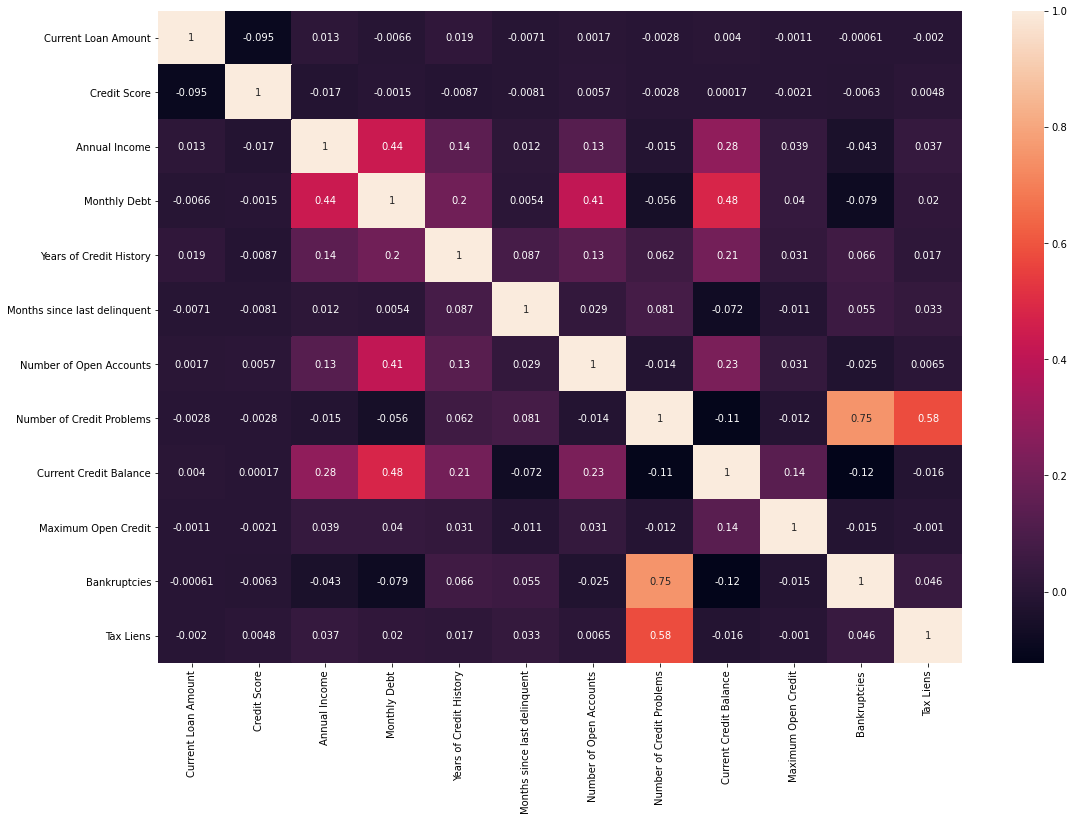

In [ ]:
corr = Loan_df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   99794 non-null  object 
 1   Current Loan Amount           99794 non-null  float64
 2   Term                          99794 non-null  object 
 3   Credit Score                  99794 non-null  float64
 4   Annual Income                 99794 non-null  float64
 5   Years in current job          99794 non-null  object 
 6   Home Ownership                99794 non-null  object 
 7   Purpose                       99794 non-null  object 
 8   Monthly Debt                  99794 non-null  float64
 9   Years of Credit History       99794 non-null  float64
 10  Months since last delinquent  99794 non-null  float64
 11  Number of Open Accounts       99794 non-null  float64
 12  Number of Credit Problems     99794 non-null  float64
 13  C

In [ ]:
backup_df=Loan_df

Fully Paid     77207
Charged Off    22587
Name: Loan Status, dtype: int64

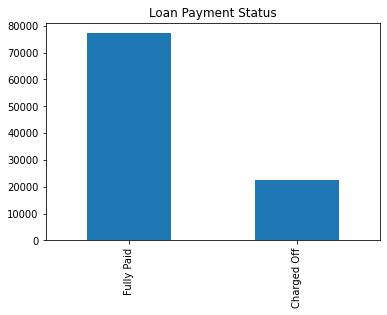

In [ ]:
pd.value_counts(Loan_df['Loan Status']).plot.bar()
plt.title('Loan Payment Status')
Loan_df['Loan Status'].value_counts()

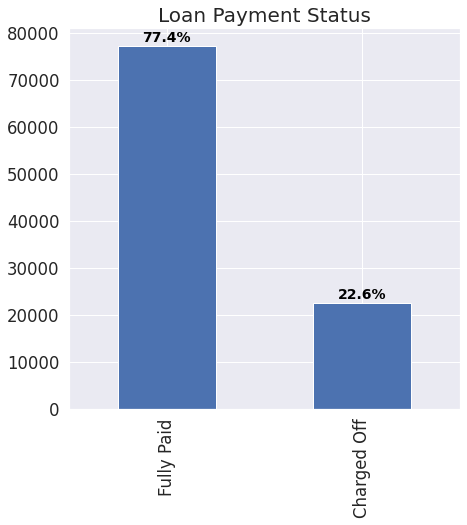

Fully Paid     77207
Charged Off    22587
Name: Loan Status, dtype: int64

In [ ]:
plt.figure(figsize=(7,7))
sns.set(font_scale =1.5)
total = float(len(Loan_df))



ax = pd.value_counts(Loan_df['Loan Status']).plot.bar()
plt.title('Loan Payment Status', fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', va='center', fontsize=14, color='black', xytext=(0,8),
                 textcoords='offset points', weight='bold')
plt.show()
Loan_df['Loan Status'].value_counts()

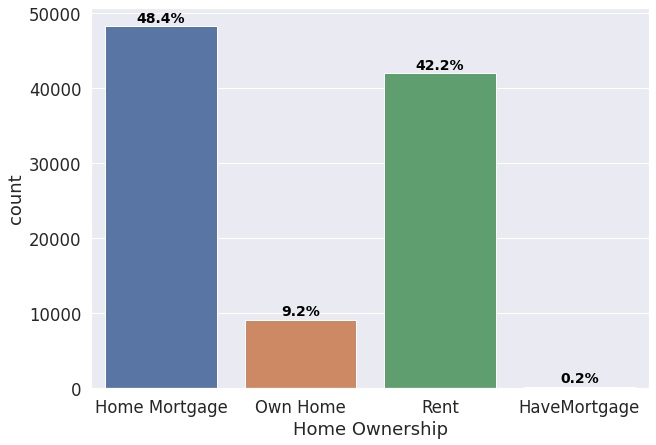

In [ ]:
plt.figure(figsize=(10,7))
ax =sns.countplot(data=Loan_df, x='Home Ownership')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', va='center', fontsize=14, color='black', xytext=(0,8),
                 textcoords='offset points', weight='bold')
plt.show()

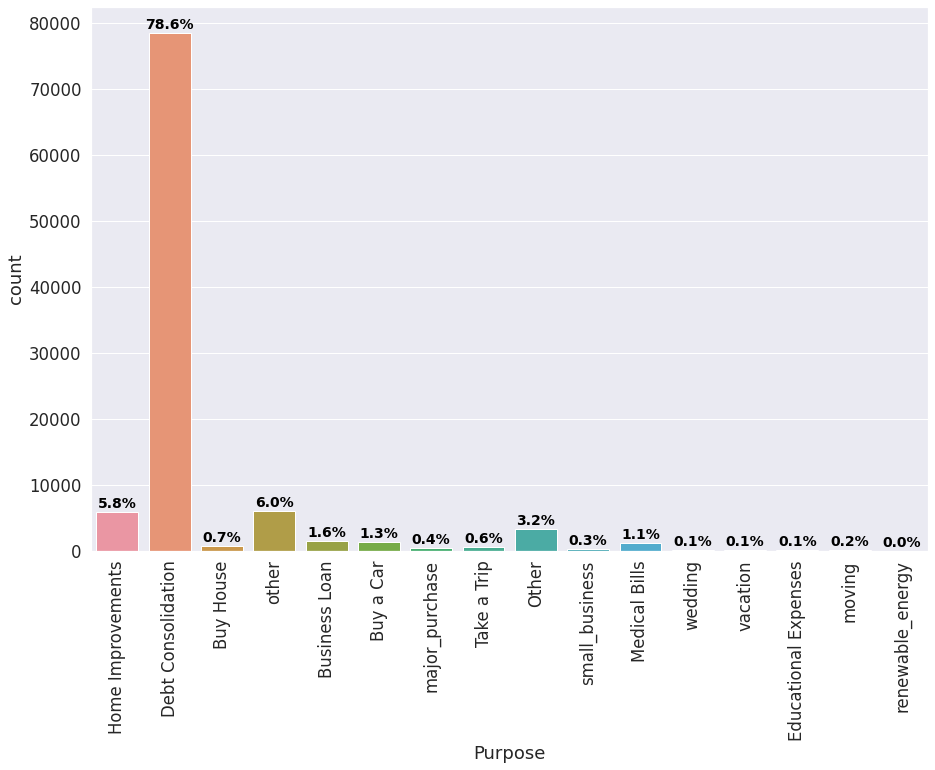

In [ ]:
plt.figure(figsize=(15,10))
ax =sns.countplot(data=Loan_df, x='Purpose')
plt.xticks(rotation=90)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', va='center', fontsize=14, color='black', xytext=(0,8),
                 textcoords='offset points', weight='bold')
plt.show()


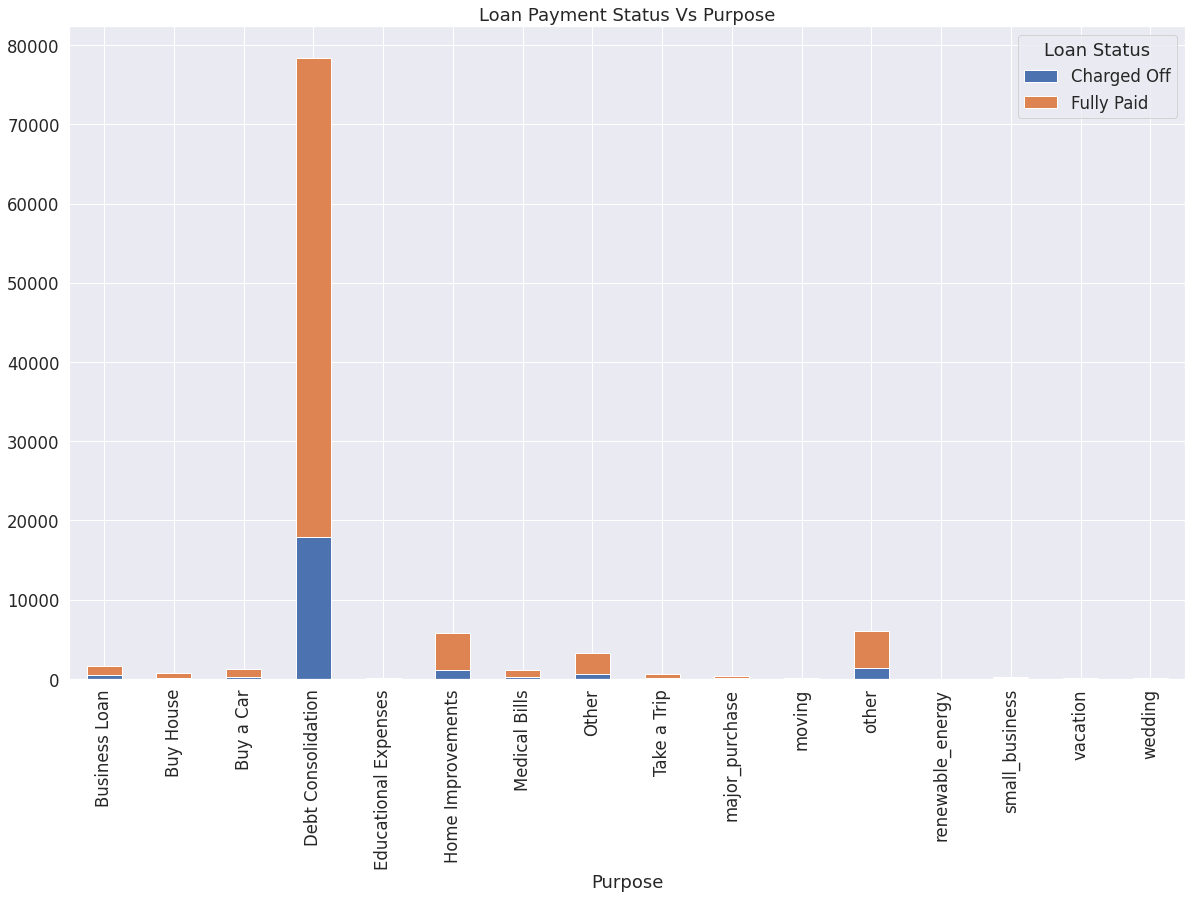

In [ ]:
pd.crosstab(Loan_df['Purpose'], Loan_df['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,12), title="Loan Payment Status Vs Purpose", )

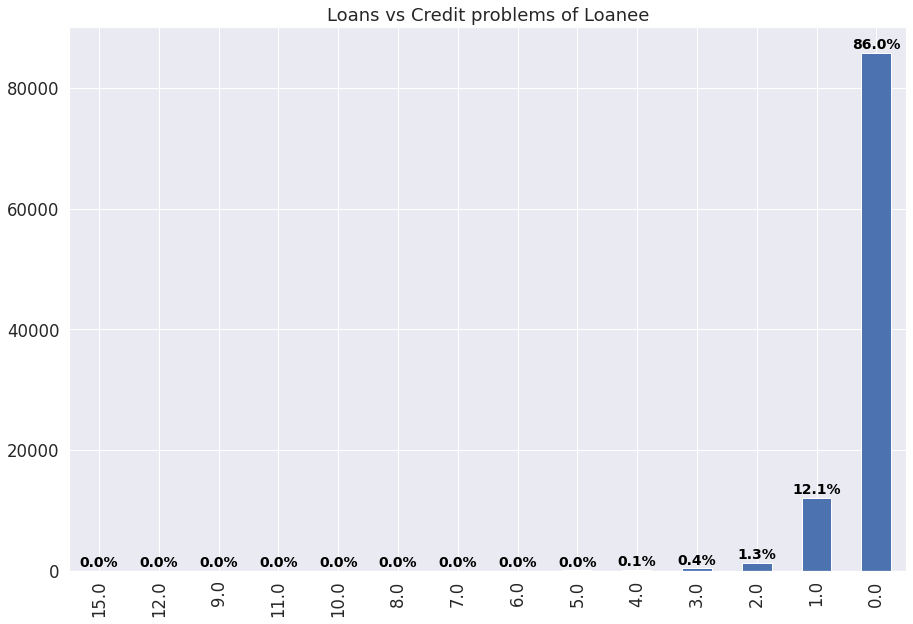

In [ ]:
plt.figure(figsize=(15,10))
ax =Loan_df['Number of Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='bar', title="Loans vs Credit problems of Loanee")
#plt.xticks(rotation=90)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center', va='center', fontsize=14, color='black', xytext=(0,8),
                 textcoords='offset points', weight='bold')
plt.show()


In [ ]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   99794 non-null  object 
 1   Current Loan Amount           99794 non-null  float64
 2   Term                          99794 non-null  object 
 3   Credit Score                  99794 non-null  float64
 4   Annual Income                 99794 non-null  float64
 5   Years in current job          99794 non-null  object 
 6   Home Ownership                99794 non-null  object 
 7   Purpose                       99794 non-null  object 
 8   Monthly Debt                  99794 non-null  float64
 9   Years of Credit History       99794 non-null  float64
 10  Months since last delinquent  99794 non-null  float64
 11  Number of Open Accounts       99794 non-null  float64
 12  Number of Credit Problems     99794 non-null  float64
 13  C

In [ ]:
Loan_df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
categorical = Loan_df.select_dtypes(include=['object']).columns
numerical = Loan_df.select_dtypes(exclude=['object']).columns
df_categorical = Loan_df[categorical]
df_numerical = Loan_df[numerical]

In [ ]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Loan Status           99794 non-null  object
 1   Term                  99794 non-null  object
 2   Years in current job  99794 non-null  object
 3   Home Ownership        99794 non-null  object
 4   Purpose               99794 non-null  object
dtypes: object(5)
memory usage: 7.1+ MB


In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           99794 non-null  float64
 1   Credit Score                  99794 non-null  float64
 2   Annual Income                 99794 non-null  float64
 3   Monthly Debt                  99794 non-null  float64
 4   Years of Credit History       99794 non-null  float64
 5   Months since last delinquent  99794 non-null  float64
 6   Number of Open Accounts       99794 non-null  float64
 7   Number of Credit Problems     99794 non-null  float64
 8   Current Credit Balance        99794 non-null  float64
 9   Maximum Open Credit           99794 non-null  float64
 10  Bankruptcies                  99794 non-null  float64
 11  Tax Liens                     99794 non-null  float64
dtypes: float64(12)
memory usage: 12.4 MB


In [ ]:
df_categorical.columns

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')

In [ ]:
Loan_df_encoded=pd.get_dummies(Loan_df,columns=['Loan Status', 'Term', 'Years in current job', 'Home Ownership','Purpose'],drop_first=True )

In [ ]:
Loan_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Current Loan Amount             99794 non-null  float64
 1   Credit Score                    99794 non-null  float64
 2   Annual Income                   99794 non-null  float64
 3   Monthly Debt                    99794 non-null  float64
 4   Years of Credit History         99794 non-null  float64
 5   Months since last delinquent    99794 non-null  float64
 6   Number of Open Accounts         99794 non-null  float64
 7   Number of Credit Problems       99794 non-null  float64
 8   Current Credit Balance          99794 non-null  float64
 9   Maximum Open Credit             99794 non-null  float64
 10  Bankruptcies                    99794 non-null  float64
 11  Tax Liens                       99794 non-null  float64
 12  Loan Status_Fully Paid          

In [ ]:
sum(Loan_df_encoded.dtypes==object)

0

In [ ]:
Loan_df_encoded

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,262328.0,1076.275101,1.378339e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,176220.0,1076.275101,1.378339e+06,20639.70,6.1,0.0,15.0,0.0,253460.0,427174.0,0.0,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.000000,4.754370e+05,2202.86,22.3,0.0,5.0,0.0,47766.0,658548.0,0.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99996,99999999.0,732.000000,1.289416e+06,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99997,103136.0,742.000000,1.150545e+06,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99998,530332.0,746.000000,1.717524e+06,9890.07,15.0,0.0,8.0,0.0,404225.0,738254.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report 

In [ ]:
df_numerical.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.979400e+04,99794.000000,9.979400e+04,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,9.979400e+04,9.979400e+04,99794.000000,99794.000000
mean,1.175728e+07,1076.275101,1.378339e+06,18486.117117,18.193694,16.357276,11.130910,0.168577,2.946602e+05,7.575265e+05,0.117743,0.029371
std,3.177985e+07,1326.293914,9.719138e+05,12172.465813,7.015261,23.023429,5.007745,0.483087,3.760668e+05,8.349533e+06,0.351427,0.258433
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796960e+05,711.000000,9.312470e+05,10228.317500,13.500000,0.000000,8.000000,0.000000,1.127698e+05,2.735260e+05,0.000000,0.000000
50%,3.124770e+05,733.000000,1.370052e+06,16237.210000,16.900000,0.000000,10.000000,0.000000,2.099120e+05,4.678740e+05,0.000000,0.000000
75%,5.250960e+05,750.000000,1.512884e+06,24025.215000,21.700000,29.000000,14.000000,0.000000,3.680680e+05,7.828260e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
df_numerical.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt','Years of Credit History', 'Months since last delinquent','Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies','Tax Liens']
Loan_df_encoded[cols] = scaler.fit_transform(Loan_df_encoded[cols])
Loan_df_encoded.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.004301,0.017906,0.006592,0.011965,0.203288,0.000000,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.002469,0.070942,0.007866,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.000000,0.022527,0.013024,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.003323,0.019639,0.004413,0.020057,0.125561,0.000000,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.001608,0.070942,0.007866,0.047356,0.037369,0.000000,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Loan_df_encoded.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status_Fully Paid,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
count,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.00000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.0000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.000000,99794.00000,99794.000000,99794.000000,99794.000000
mean,0.117437,0.070942,0.007866,0.042415,0.218142,0.092939,0.146459,0.011238,0.008962,0.000492,0.016820,0.001958,0.773664,0.721506,0.353849,0.091228,0.081678,0.061447,0.06792,0.056877,0.055845,0.045784,0.039572,0.081307,0.484338,0.091809,0.421719,0.006794,0.012626,0.785919,0.000932,0.0584,0.011263,0.032487,0.005732,0.003527,0.001503,0.060224,0.00010,0.002776,0.001012,0.001122
std,0.317847,0.191523,0.005873,0.027929,0.104862,0.130815,0.065891,0.032206,0.011438,0.005423,0.050204,0.017229,0.418461,0.448260,0.478165,0.287934,0.273875,0.240149,0.25161,0.231609,0.229623,0.209018,0.194951,0.273308,0.499757,0.288758,0.493836,0.082146,0.111654,0.410185,0.030513,0.2345,0.105529,0.177290,0.075492,0.059286,0.038741,0.237903,0.01001,0.052612,0.031797,0.033482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.001643,0.018195,0.005164,0.023468,0.147982,0.000000,0.105263,0.000000,0.003430,0.000178,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.002971,0.021372,0.007816,0.037255,0.198804,0.000000,0.131579,0.000000,0.006384,0.000304,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.005098,0.023827,0.008679,0.055124,0.270553,0.164773,0.184211,0.000000,0.011195,0.000508,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [ ]:
df_categorical['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
#target column is "Loan Status_Fully Paid"
X=Loan_df_encoded.drop(["Loan Status_Fully Paid"],1)
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.004301,0.017906,0.006592,0.011965,0.203288,0.000000,0.078947,0.066667,0.006940,0.000271,0.142857,0.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.002469,0.070942,0.007866,0.076394,0.261584,0.045455,0.460526,0.000000,0.006995,0.000553,0.000000,0.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.000000,0.022527,0.013024,0.066998,0.168909,0.164773,0.236842,0.066667,0.009063,0.000487,0.000000,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.003323,0.019639,0.004413,0.020057,0.125561,0.000000,0.118421,0.000000,0.007796,0.000251,0.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.001608,0.070942,0.007866,0.047356,0.037369,0.000000,0.197368,0.000000,0.007709,0.000277,0.000000,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=Loan_df_encoded["Loan Status_Fully Paid"]

In [ ]:
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (69855, 41)
Number transactions y_train dataset:  (69855,)
Number transactions X_test dataset:  (29939, 41)
Number transactions y_test dataset:  (29939,)


#1. Logestic Regression

In [ ]:
classifier_logi = LogisticRegression()
classifier_logi.fit(X_train,y_train)

# Let us check the accuracy of the model with k-cross validation.
accuracy = cross_val_score(estimator=classifier_logi, X=X_train, y=y_train, cv=10)
print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Logistic Regressor Model is 	 0.819883991318356
The deviation in the accuracy is 	 0.0015584188744983906


In [ ]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

predictions = LR.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.20      0.33      6787
           1       0.81      1.00      0.89     23152

    accuracy                           0.82     29939
   macro avg       0.90      0.60      0.61     29939
weighted avg       0.85      0.82      0.77     29939



#2. Random Forest Classifier

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

predictions = RF.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.87      0.23      0.36      6787
           1       0.81      0.99      0.89     23152

    accuracy                           0.82     29939
   macro avg       0.84      0.61      0.63     29939
weighted avg       0.83      0.82      0.77     29939



#3.AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(X_train,y_train)

predictions = AB.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.97      0.20      0.34      6787
           1       0.81      1.00      0.89     23152

    accuracy                           0.82     29939
   macro avg       0.89      0.60      0.61     29939
weighted avg       0.85      0.82      0.77     29939



**The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.**

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
  

Before OverSampling, counts of label '1': 54055
Before OverSampling, counts of label '0': 15800 

After OverSampling, the shape of train_X: (108110, 41)
After OverSampling, the shape of train_y: (108110,) 

After OverSampling, counts of label '1': 54055
After OverSampling, counts of label '0': 54055


##Applying Models after Oversampling

#1.Logestic Regression

In [ ]:
LR1 = LogisticRegression() 
LR1.fit(X_train_res, y_train_res) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = LR1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.37      0.58      0.45      6787
           1       0.85      0.71      0.78     23152

    accuracy                           0.68     29939
   macro avg       0.61      0.65      0.62     29939
weighted avg       0.74      0.68      0.70     29939



In [ ]:
RF1=RandomForestClassifier()
RF1.fit(X_train_res, y_train_res) 

predictions = RF1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.56      0.39      0.46      6787
           1       0.84      0.91      0.87     23152

    accuracy                           0.79     29939
   macro avg       0.70      0.65      0.67     29939
weighted avg       0.77      0.79      0.78     29939



#Applying Recursive feature elimiation with cross validation

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
# instantiate K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=kf, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

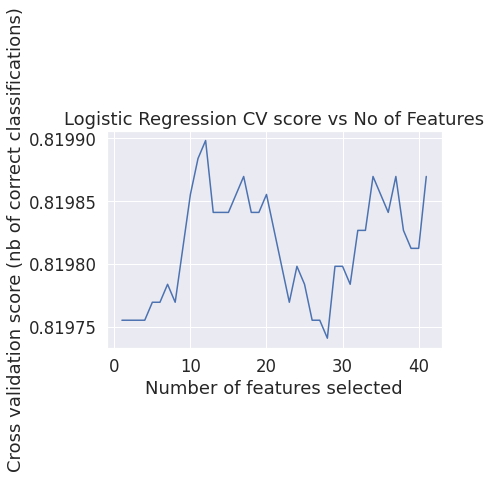

In [ ]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE
classifier = LogisticRegression()
#Select best feature 
rfe = RFE(classifier, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True False False False  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False  True False False]
[ 1  1  1  2  4 17  1  1  1  1  1  1  1 25 21 18 28 22 26 30 29 24 27  8
  7  3  9  1 11  5 10 15  6 13 14 23 12 16  1 20 19]


Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Short Term', 'Purpose_Buy a Car',
       'Purpose_small_business'],
      dtype='object')

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

predictions = classifier.predict(X_test[X_test.columns[rfe.support_]]) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.20      0.33      6787
           1       0.81      1.00      0.89     23152

    accuracy                           0.82     29939
   macro avg       0.90      0.60      0.61     29939
weighted avg       0.85      0.82      0.77     29939



#2. Random Forest Classifier

In [ ]:
classifier1=RandomForestClassifier()
classifier1.fit(X_train[X_train.columns[rfe.support_]], y_train)

predictions = classifier.predict(X_test[X_test.columns[rfe.support_]]) 

# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       1.00      0.20      0.33      6787
           1       0.81      1.00      0.89     23152

    accuracy                           0.82     29939
   macro avg       0.90      0.60      0.61     29939
weighted avg       0.85      0.82      0.77     29939



In [ ]:
from sklearn.datasets import make_classification

Feature: 0, Score: 0.11853
Feature: 1, Score: 0.21250
Feature: 2, Score: 0.07394
Feature: 3, Score: 0.09103
Feature: 4, Score: 0.08482
Feature: 5, Score: 0.04661
Feature: 6, Score: 0.05971
Feature: 7, Score: 0.00896
Feature: 8, Score: 0.08875
Feature: 9, Score: 0.08999
Feature: 10, Score: 0.00656
Feature: 11, Score: 0.00312
Feature: 12, Score: 0.01228
Feature: 13, Score: 0.01053
Feature: 14, Score: 0.00672
Feature: 15, Score: 0.00582
Feature: 16, Score: 0.00543
Feature: 17, Score: 0.00593
Feature: 18, Score: 0.00538
Feature: 19, Score: 0.00526
Feature: 20, Score: 0.00497
Feature: 21, Score: 0.00451
Feature: 22, Score: 0.00641
Feature: 23, Score: 0.00452
Feature: 24, Score: 0.00386
Feature: 25, Score: 0.00444
Feature: 26, Score: 0.00128
Feature: 27, Score: 0.00143
Feature: 28, Score: 0.00829
Feature: 29, Score: 0.00024
Feature: 30, Score: 0.00397
Feature: 31, Score: 0.00195
Feature: 32, Score: 0.00296
Feature: 33, Score: 0.00095
Feature: 34, Score: 0.00083
Feature: 35, Score: 0.00047
Fe

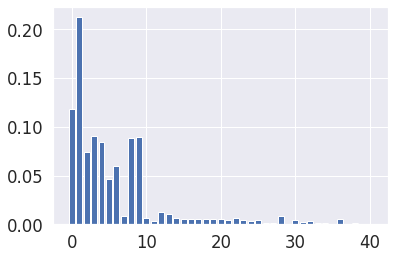

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 54055
Before OverSampling, counts of label '0': 15800 

After OverSampling, the shape of train_X: (108110, 41)
After OverSampling, the shape of train_y: (108110,) 

After OverSampling, counts of label '1': 54055
After OverSampling, counts of label '0': 54055


In [ ]:
RF1 = RandomForestClassifier() 
RF1.fit(X_train_res, y_train_res) 

predictions = RF1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.56      0.39      0.46      6787
           1       0.84      0.91      0.87     23152

    accuracy                           0.79     29939
   macro avg       0.70      0.65      0.67     29939
weighted avg       0.77      0.79      0.78     29939



#Find important features with Random Forest model

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Credit Score                      0.214490
Current Loan Amount               0.117875
Monthly Debt                      0.090162
Maximum Open Credit               0.089289
Current Credit Balance            0.089062
Years of Credit History           0.085583
Annual Income                     0.073074
Number of Open Accounts           0.059810
Months since last delinquent      0.045970
Term_Short Term                   0.011999
Years in current job_10+ years    0.010393
Number of Credit Problems         0.008885
Purpose_Debt Consolidation        0.008291
Years in current job_2 years      0.006681
Bankruptcies                      0.006550
Years in current job_< 1 year     0.006393
Years in current job_3 years      0.006093
Years in current job_5 years      0.005821
Years in current job_6 years      0.005580
Years in current job_4 years      0.005418
Years in current job_7 years      0.005249
Years in current job_8 years      0.004965
Purpose_other                     0.004871
Home Owners

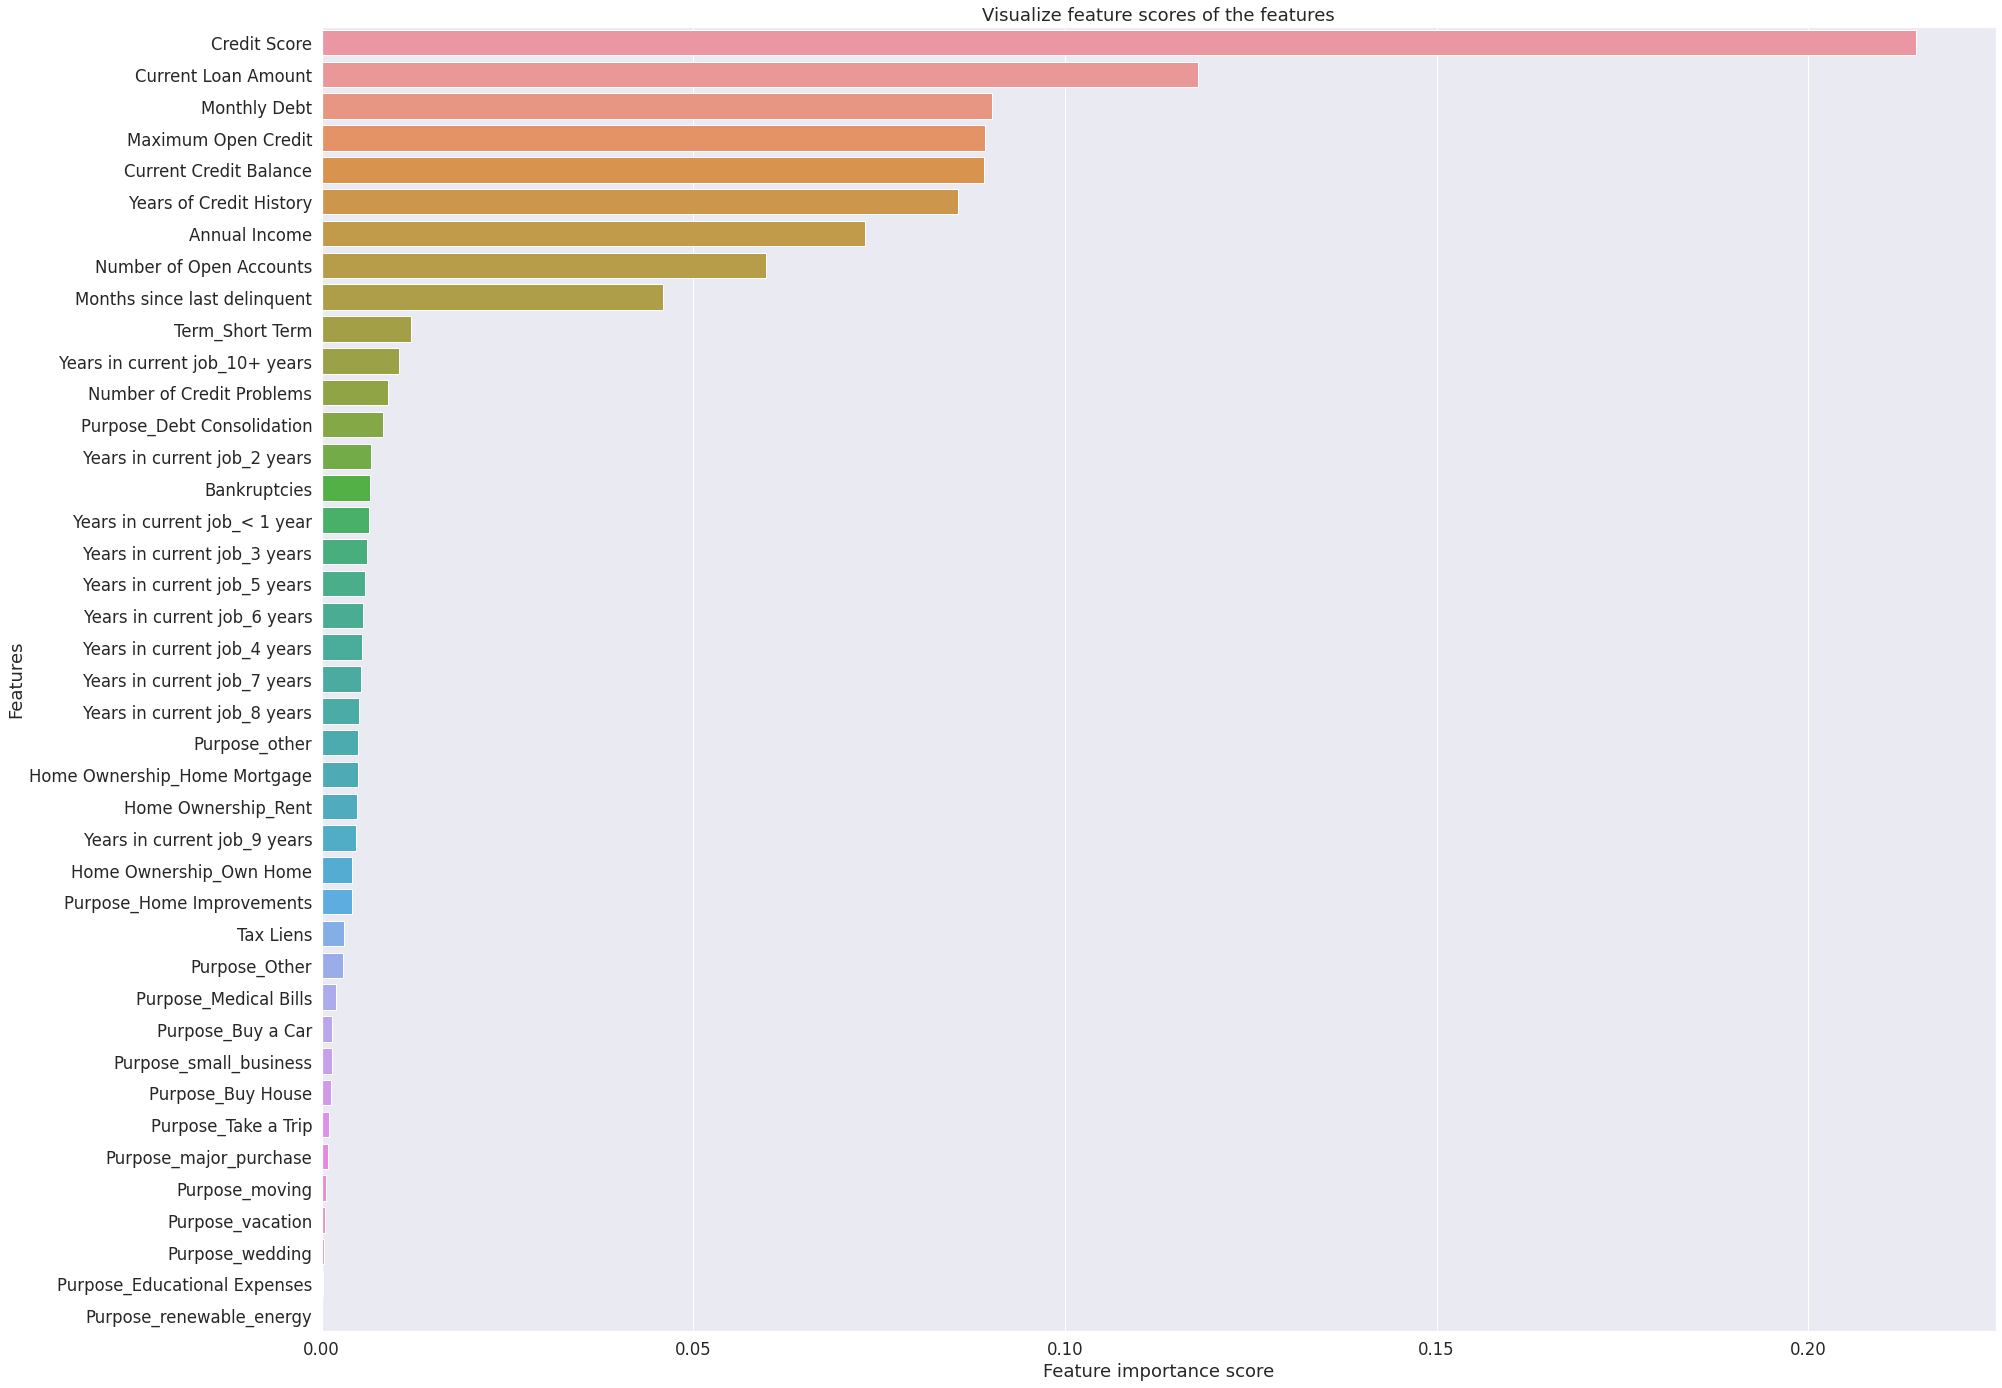

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
# drop the least important feature from X_train and X_test

X_train_fi = X_train[['Credit Score','Current Loan Amount','Monthly Debt','Maximum Open Credit','Current Credit Balance','Years of Credit History','Annual Income','Number of Open Accounts','Months since last delinquent']]
X_test_fi = X_test[['Credit Score','Current Loan Amount','Monthly Debt','Maximum Open Credit','Current Credit Balance','Years of Credit History','Annual Income','Number of Open Accounts','Months since last delinquent']]

In [ ]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train_fi, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test_fi)

# Check accuracy score 
print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with native_country_41 variable removed : 0.8164


In [ ]:
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.56      0.39      0.46      6787
           1       0.84      0.91      0.87     23152

    accuracy                           0.79     29939
   macro avg       0.70      0.65      0.67     29939
weighted avg       0.77      0.79      0.78     29939



In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res1, y_train_res1 = sm.fit_sample(X_train_fi, y_train) 


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
  

Before OverSampling, counts of label '1': 54055
Before OverSampling, counts of label '0': 15800 

After OverSampling, the shape of train_X: (108110, 41)
After OverSampling, the shape of train_y: (108110,) 

After OverSampling, counts of label '1': 54055
After OverSampling, counts of label '0': 54055


In [ ]:
RF2=RandomForestClassifier()
RF2.fit(X_train_res1, y_train_res1) 

predictions = RF2.predict(X_test_fi) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.46      0.51      0.49      6787
           1       0.85      0.83      0.84     23152

    accuracy                           0.75     29939
   macro avg       0.66      0.67      0.66     29939
weighted avg       0.76      0.75      0.76     29939



In [ ]:
RF2=RandomForestClassifier(n_estimators=50, random_state=0)
RF2.fit(X_train_res1, y_train_res1) 

predictions = RF2.predict(X_test_fi) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.46      0.52      0.48      6787
           1       0.85      0.82      0.84     23152

    accuracy                           0.75     29939
   macro avg       0.65      0.67      0.66     29939
weighted avg       0.76      0.75      0.76     29939



#3.AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(X_train_res1,y_train_res1)

predictions = AB.predict(X_test_fi) 

# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.36      0.65      0.46      6787
           1       0.87      0.66      0.75     23152

    accuracy                           0.66     29939
   macro avg       0.61      0.65      0.60     29939
weighted avg       0.75      0.66      0.68     29939

